In [1]:
from qiskit import __version__
print(__version__)

1.3.1


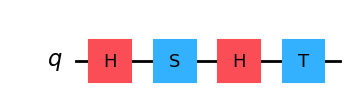

In [9]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.quantum_info import Operator
#from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

circuit = QuantumCircuit(1)
circuit.h(0)
circuit.s(0)
circuit.h(0)
circuit.t(0)

display(circuit.draw(output="mpl"))

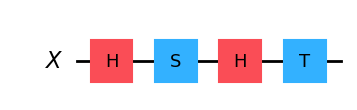

In [39]:
X = QuantumRegister(1, "X")

qc = QuantumCircuit(X)
qc.h(X)
qc.s(X)
qc.h(X)
qc.t(X)

display(qc.draw(output="mpl"))

          
q_0: ──■──
     ┌─┴─┐
q_1: ┤ X ├
     └───┘
     ┌───┐
q_0: ┤ X ├
     └─┬─┘
q_1: ──■──
          


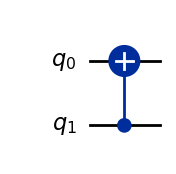

In [52]:
# Controlled-NOT gate

## Create a quantum circuit with 2 qubits
qc = QuantumCircuit(2)


# Apply a CNOT gate with qubit 0 as control and qubit 1 as target
qc.cx(0, 1)

# Draw the circuit
print(qc)

## Create a quantum circuit with 2 qubits
qc1 = QuantumCircuit(2)

# Apply a CNOT gate with qubit 1 as control and qubit 0 as target
qc1.cx(1, 0)
print(qc1)

qc.draw("mpl")
qc1.draw("mpl")

In [23]:
from qiskit.quantum_info import Statevector
state = Statevector.from_instruction(qc)

print("State after applying CNOT gate:", state)

State after applying CNOT gate: Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))


In [29]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector

# Create a 2-qubit quantum circuit
qc = QuantumCircuit(2)

# Initialize the qubits to a superposition state (|ψ⟩ = (|00⟩ + |10⟩)/√2)
#qc.h(0)

# Apply a CNOT gate
qc.cx(0, 1)

# Simulate the final statevector
state = Statevector.from_instruction(qc)

# Print the final statevector
print("Statevector after CNOT:", state)

Statevector after CNOT: Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))


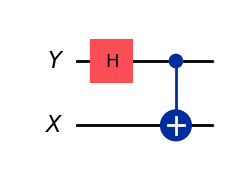

<IPython.core.display.Latex object>

In [53]:
X = QuantumRegister(1, "X")
Y = QuantumRegister(1, "Y")
qc = QuantumCircuit(Y,X)
qc.h(Y)
qc.cx(Y, X)

display(qc.draw(output="mpl"))
display(Operator.from_circuit(qc).draw("latex"))

Final Statevector: Statevector([0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))


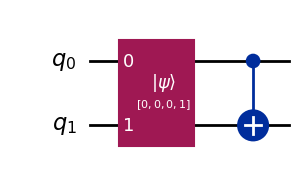

In [77]:
# Initialize a Custom State Using initialize:

qc = QuantumCircuit(2)

# Define the initial state vector for |01⟩
# |01⟩ corresponds to [0, 1, 0, 0] in computational basis
initial_state = [0, 0, 0, 1]

#initialize qubits
qc.initialize(initial_state, [0,1])

qc.cx(0,1)

state = Statevector.from_instruction(qc)
# Print the final statevector
print("Final Statevector:", state)

qc.draw("mpl")


In [75]:
# STatndard Basis states using gates

qc = QuantumCircuit(2)

qc.x(1)

qc.cx(0,1)

state = Statevector.from_instruction(qc)
# Print the final statevector
print("Final Statevector:", state)

qc.draw("mpl")

print(qc)

Final Statevector: Statevector([0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
            dims=(2, 2))
               
q_0: ───────■──
     ┌───┐┌─┴─┐
q_1: ┤ X ├┤ X ├
     └───┘└───┘


In [78]:
#Superposition States Using h

from qiskit import QuantumCircuit

# Create a circuit with 2 qubits
qc = QuantumCircuit(2)

# Apply a Hadamard gate to the first qubit to create superposition
qc.h(0)

# Apply a CNOT gate to entangle the qubits
qc.cx(0, 1)

state = Statevector.from_instruction(qc)
# Print the final statevector
print("Final Statevector:", state)

# Print the circuit
print(qc)


Final Statevector: Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))
     ┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘


In [58]:
# Custom State Preparatfrom qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
import numpy as np

# Create the statevector for (|00⟩ + |11⟩)/√2
state = Statevector([1/np.sqrt(2), 0, 0, 1/np.sqrt(2)])

# Create a circuit and initialize it with the statevector
qc = QuantumCircuit(2)
qc.initialize(state, [0, 1])

# Print the circuit
print(qc)


     ┌──────────────────────────────────┐
q_0: ┤0                                 ├
     │  Initialize(0.70711,0,0,0.70711) │
q_1: ┤1                                 ├
     └──────────────────────────────────┘


<IPython.core.display.Latex object>

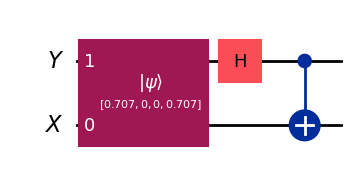

<IPython.core.display.Latex object>

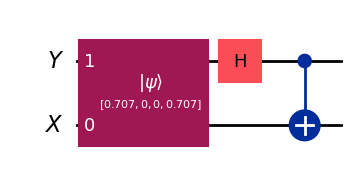

In [83]:
X = QuantumRegister(1, "X")
Y = QuantumRegister(1, "Y")
# Create the statevector for (|00⟩ + |11⟩)/√2
state = Statevector([1/np.sqrt(2), 0, 0, 1/np.sqrt(2)])

qc = QuantumCircuit(Y,X)
U = Operator.from_circuit(qc)

qc.initialize(state, [X[0], Y[0]])

qc.h(Y)
qc.cx(Y, X)

state = Statevector.from_instruction(qc)
# Print the final statevector
#print("Final Statevector:", state)
display(state.draw("latex"))

display(state.evolve(U).draw("latex"))

qc.draw("mpl")
#display(Operator.from_circuit(qc).draw("latex"))